En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario (clase 0, 1, 2)

Realiza de nuevo el ejercicio con eliminando la clase 1 del dataframe y entrena un clasificador binario. ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [11]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [13]:
df.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [14]:
X = df.drop(columns=['clase'])
y = df.clase

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [15]:
y_test.value_counts()

0    17
2     9
1     8
Name: clase, dtype: int64

In [16]:
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
# Accuracy
model.score(X_test,y_test)

0.7352941176470589

In [ ]:
print(classification_report(y_test,y_pred))

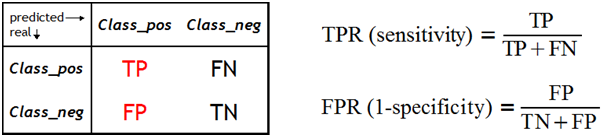

In [ ]:
y_test.value_counts()

In [ ]:
confusion_matrix(y_test, y_pred)

Eliminamos la clase 1

In [ ]:
df2 = df.loc[df.clase!=1]
df2.clase.unique()

In [ ]:
X = df2.drop(columns=['clase'])
y = df2.clase

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [ ]:
y_train.unique()

In [ ]:
model2 = LogisticRegression(penalty='none', max_iter=1000)
model2.fit(X_train, y_train)

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
# Accuracy
model2.score(X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred2))

In [ ]:
confusion_matrix(y_test, y_pred2)

In [ ]:

predictions = model2.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve([1 if el==2 else el for el in y_test.values], predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Probamos a escalar

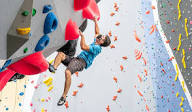

In [3]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


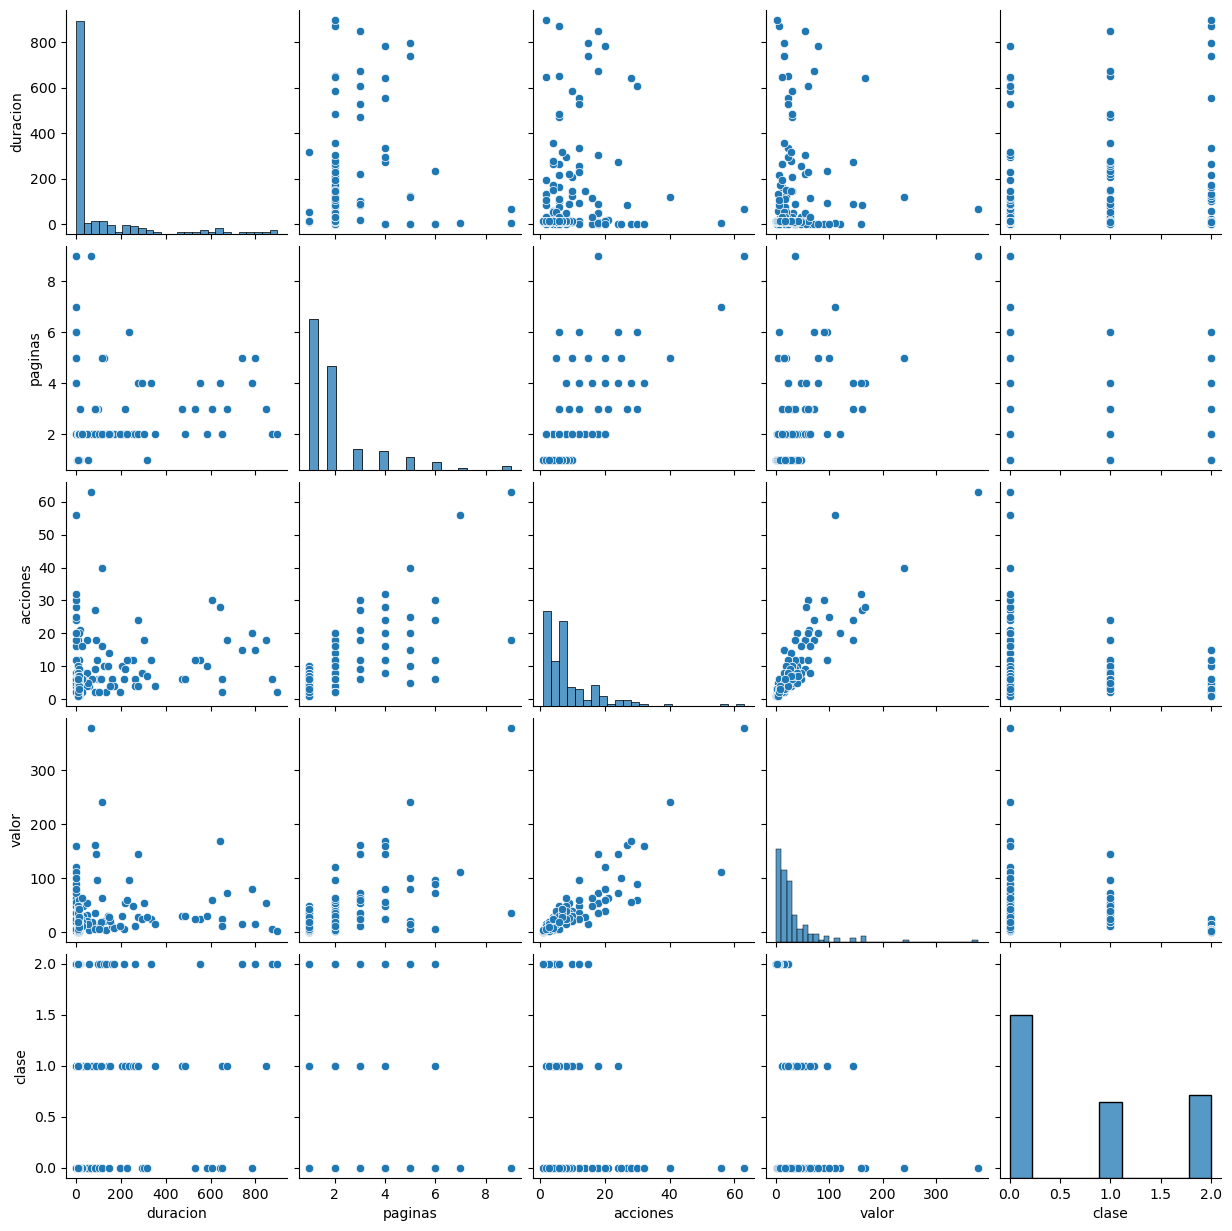

In [4]:
sns.pairplot(df)

Como las variables no tienen una distribución normal, es preferible
utilizar MinMaxScaler

In [40]:
X = df.drop(columns=['clase'])
y = df.clase

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

In [34]:
pd.DataFrame(X_scaled,columns=X_train.columns)

,duracion,paginas,acciones,valor
0,-0.385494,-0.055565,0.691933,0.598852
1,-0.474996,-0.685303,-0.632026,-0.606492
2,-0.286047,-0.055565,-0.122811,-0.066166
3,-0.470024,-0.685303,-0.224654,0.141652
4,-0.107041,-0.055565,-0.733869,-0.606492
...,...,...,...,...
131,-0.474996,-0.685303,-0.632026,-0.668837
132,0.131632,-0.055565,-0.733869,-0.648056
133,-0.465052,-0.685303,-0.326497,0.016962
134,-0.519295,1.833648,-0.428340,-0.627274


In [42]:
model = LogisticRegression(penalty='l2')
model.fit(X_scaled, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(scaler.transform(X_test))

In [44]:
y_pred

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [45]:
# Accuracy
model.score(scaler.transform(X_test),y_test)

0.7058823529411765

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       1.00      0.38      0.55         8
           2       0.60      1.00      0.75         9

    accuracy                           0.71        34
   macro avg       0.78      0.69      0.67        34
weighted avg       0.77      0.71      0.69        34



## Utilizando GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1','none'], 'solver': ['liblinear', 'sag', 'saga'], 
       'C': np.arange(1, 10, 1),'max_iter':[100,1000,10000]}

model = LogisticRegression()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py", li

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'none'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='f1')

In [22]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
grid_search.best_estimator_.score(X_test, y_test)

0.7058823529411765

‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘newton-cholesky’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2','none'], 'solver': ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky','sag','saga'], 
       'C': np.arange(1, 10, 1),'max_iter':[100,1000,10000]}

model = LogisticRegression()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py", l

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [27]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [26]:
grid_search.best_estimator_.score(X_test, y_test)

0.7352941176470589

In [ ]:
LogisticRegression()

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['elasticnet','none'], 'solver': ['saga'], 
       'C': np.arange(1, 10, 1),'max_iter':[100,1000,10000],
             'l1_ratio':np.arange(0,1,0.01)}

model = LogisticRegression()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1
                          )

grid_search.fit(X_train, y_train)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['elasticnet', 'none'],
                         'solver': ['saga']},


In [33]:
grid_search.best_params_

{'C': 1,
 'l1_ratio': 0.0,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [34]:
grid_search.best_estimator_.score(X_test, y_test)

0.5588235294117647

In [35]:
model = LogisticRegression(penalty='l1',solver='liblinear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7058823529411765